<a href="https://colab.research.google.com/github/reban87/knowledge-graph-and-graphdb-with-langchain/blob/main/Networkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# !python -m spacy download en_core_web_sm
# !pip install spacy networkx matplotlib

In [8]:
# Now, import the necessary libraries
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import output
output.enable_custom_widget_manager()

In [9]:
# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

In [10]:
def process_story(story):
    """Extract entities and relations from the story"""
    doc = nlp(story)

    entities = [ent.text for ent in doc.ents]
    relations = []

    for token in doc:
        if token.dep_ in ("nsubj", "dobj", "pobj"):
            relations.append((token.head.text, token.dep_, token.text))

    return entities, relations

In [11]:
def create_knowledge_graph(entities, relations):
    """Create a knowledge graph using NetworkX"""
    G = nx.Graph()

    # Add entities as nodes
    for entity in entities:
        G.add_node(entity)

    # Add relations as edges
    for relation in relations:
        G.add_edge(relation[0], relation[2], label=relation[1])

    return G

In [12]:
def basic_inference(G):
    """Perform basic inference on the graph"""
    inferences = []

    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        if len(neighbors) > 1:
            inferences.append(f"{node} is related to {' and '.join(neighbors)}")

    return inferences

In [20]:
from collections import defaultdict
def visualize_graph(G):
    """Visualize the knowledge graph"""
    plt.figure(figsize=(16, 12))
    pos = nx.spring_layout(G, k=0.9, iterations=50)

    # Prepare node colors based on node degree
    node_degrees = dict(G.degree())
    node_colors = [plt.cm.viridis(deg/max(node_degrees.values())) for deg in node_degrees.values()]

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=3000, alpha=0.8)

    # Draw node labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

    # Prepare edge colors and widths
    edge_colors = []
    edge_widths = []
    for (u, v, data) in G.edges(data=True):
        if data['label'] == 'nsubj':
            edge_colors.append('r')
            edge_widths.append(2.0)
        elif data['label'] == 'dobj':
            edge_colors.append('g')
            edge_widths.append(2.0)
        elif data['label'] == 'pobj':
            edge_colors.append('b')
            edge_widths.append(2.0)
        else:
            edge_colors.append('gray')
            edge_widths.append(1.0)

    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths,
                           arrowsize=20, arrowstyle='->', connectionstyle='arc3,rad=0.1')

    # Prepare edge labels
    edge_labels = defaultdict(str)
    for (u, v, data) in G.edges(data=True):
        edge_labels[(u,v)] += data['label'] + '\n'

    # Draw edge labels
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Business Scenario Knowledge Graph", fontsize=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

Processing story:

TechCorp, a software company, launched a new product last quarter. 
The CEO, Sarah Johnson, presented the financial results to the board of directors. 
Revenue increased by 15%, largely due to the successful product launch. 
However, operating costs also rose by 8% because of increased marketing expenses. 
The board expressed concerns about the rising costs but praised the overall growth. 
Sarah assured them that the marketing investment would pay off in the long term. 
She also mentioned plans to expand into the Asian market next year. 


Extracted Entities:
['TechCorp', 'last quarter', 'Sarah Johnson', '15%', '8%', 'Sarah', 'Asian', 'next year']

Extracted Relations:
launched --nsubj--> TechCorp
launched --dobj--> product
presented --nsubj--> CEO
presented --dobj--> results
to --pobj--> board
of --pobj--> directors
increased --nsubj--> Revenue
by --pobj--> %
due --pobj--> launch
rose --nsubj--> costs
by --pobj--> %
because --pobj--> expenses
expressed --nsubj--> bo

<ipython-input-20-0c40c10d5c8d>:35: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths,
<ipython-input-20-0c40c10d5c8d>:35: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths,
<ipython-input-20-0c40c10d5c8d>:35: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to


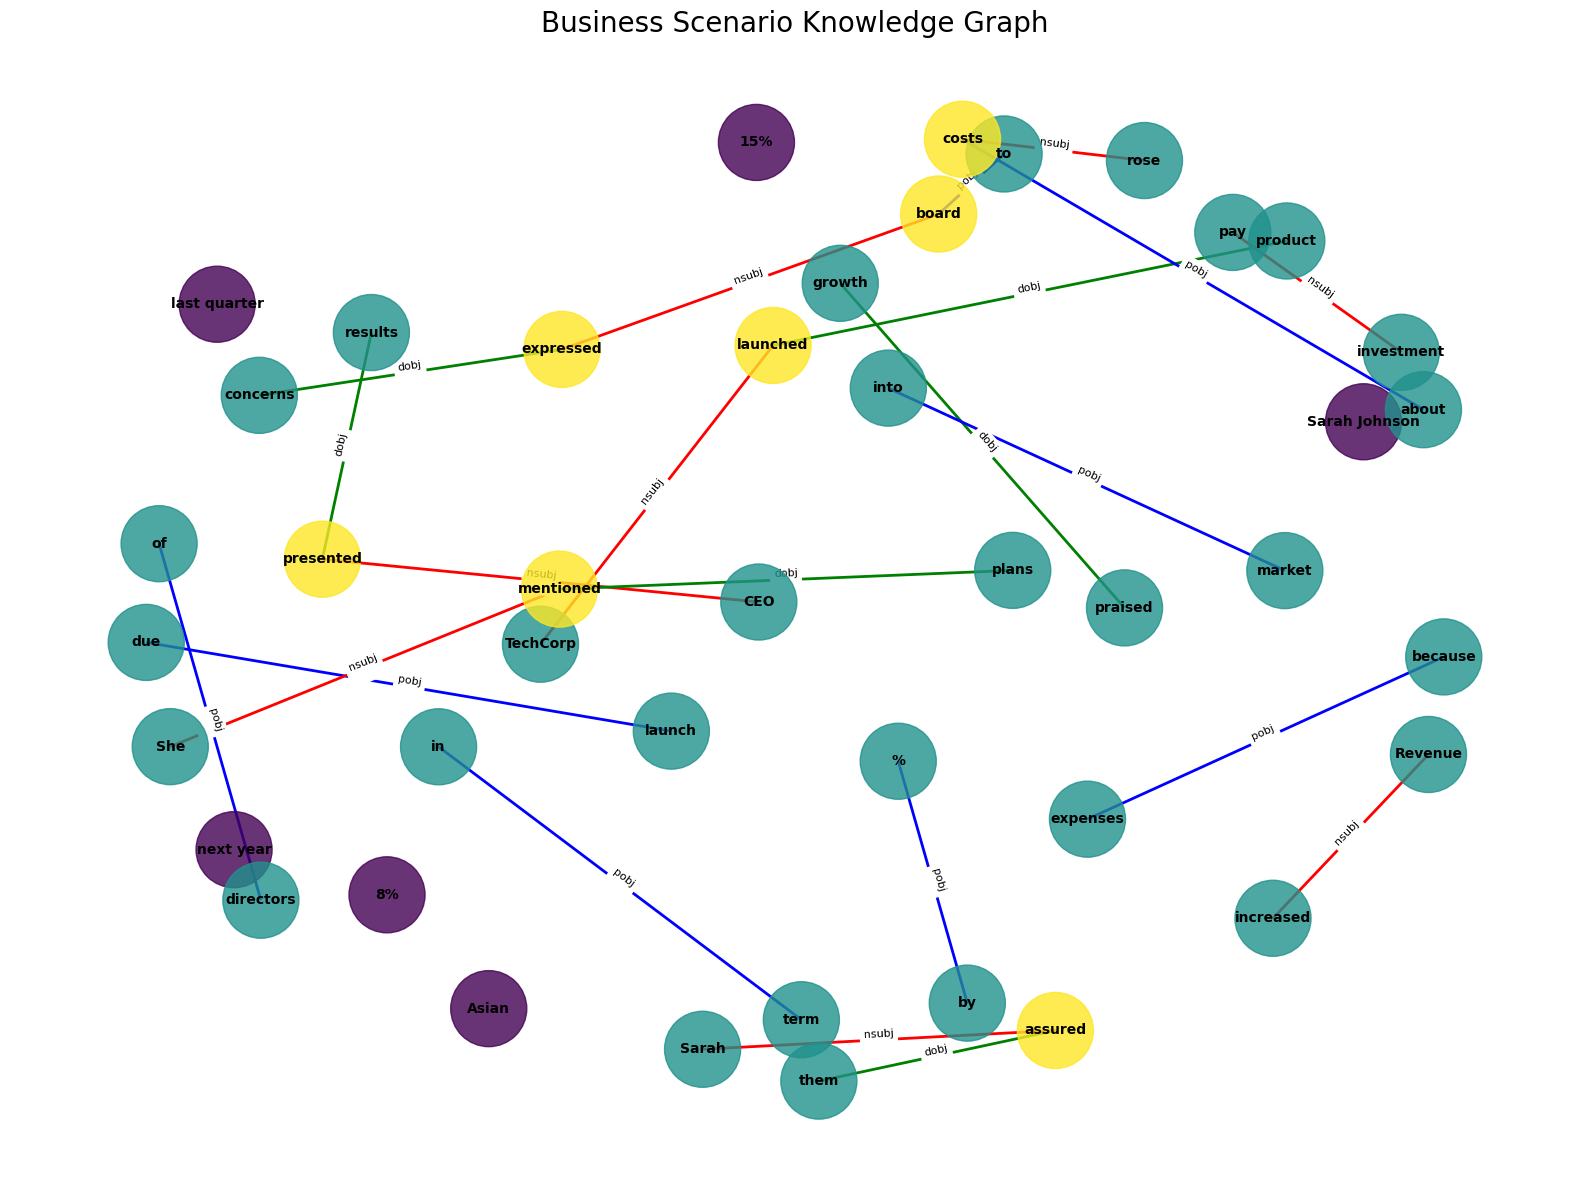

In [21]:
# Sample story
story = """
TechCorp, a software company, launched a new product last quarter.
The CEO, Sarah Johnson, presented the financial results to the board of directors.
Revenue increased by 15%, largely due to the successful product launch.
However, operating costs also rose by 8% because of increased marketing expenses.
The board expressed concerns about the rising costs but praised the overall growth.
Sarah assured them that the marketing investment would pay off in the long term.
She also mentioned plans to expand into the Asian market next year.
"""

print("Processing story:")
print(story)

# Process the story
entities, relations = process_story(story)

print("\nExtracted Entities:")
print(entities)

print("\nExtracted Relations:")
for relation in relations:
    print(f"{relation[0]} --{relation[1]}--> {relation[2]}")

# Create knowledge graph
G = create_knowledge_graph(entities, relations)

# Perform basic inference
inferences = basic_inference(G)

print("\nBasic Inferences:")
for inference in inferences:
    print(f"- {inference}")

# Visualize the graph
visualize_graph(G)